# Laboratorio 3 - Regresión Logistica

En este ejercicio se implementa regresion logistica, para predecir el modo de un genero de musica.
El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. El mayor está representado por 1 y el menor es 0.

In [59]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# usando la libreria pandas para la manipulacion y analisis de datos
import pandas as pd

# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

#Importamos seaborn una biblioteca de visualización de datos de Python basada en matplotlib .
import seaborn as sns

## 1 Regresion Logistica

En esta parte del ejercicio, creará un modelo de regresión logística para predecir el modo de un genero de musica

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [60]:
#Carga de dataset para prediccion
data = pd.read_csv('datasets/data_by_genres.csv')
# Mostramos los datos de el dataset cargado
#print(data)
data.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


In [61]:
# Mostramos la informacion de los datos del dataset donde podemos ver un elemento tipo object
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2664 non-null   object 
 1   acousticness      2664 non-null   float64
 2   danceability      2664 non-null   float64
 3   duration_ms       2664 non-null   float64
 4   energy            2664 non-null   float64
 5   instrumentalness  2664 non-null   float64
 6   liveness          2664 non-null   float64
 7   loudness          2664 non-null   float64
 8   speechiness       2664 non-null   float64
 9   tempo             2664 non-null   float64
 10  valence           2664 non-null   float64
 11  popularity        2664 non-null   float64
 12  key               2664 non-null   int64  
 13  mode              2664 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 291.5+ KB


In [62]:
#convierte las variables categoricas a numericas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#convierte las variables fechas a numericas en este caso no la usaremos
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [63]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])
  
  # Mostramos lel resultado de los datos convertidos
print(data)

      genres  acousticness  danceability   duration_ms    energy  \
0          0      0.494780      0.299333  1.048887e+06  0.450678   
1          1      0.679245      0.521473  2.298526e+05  0.401522   
2          2      0.621532      0.577017  1.936522e+05  0.345694   
3          3      0.359395      0.459500  3.430185e+05  0.487000   
4          4      0.353347      0.694400  2.338244e+05  0.613400   
...      ...           ...           ...           ...       ...   
2659    2659      0.218600      0.560365  2.675453e+05  0.611985   
2660    2660      0.124000      0.834000  2.951470e+05  0.674000   
2661    2661      0.233181      0.752762  2.951100e+05  0.627238   
2662    2662      0.052700      0.776000  2.293330e+05  0.656000   
2663    2663      0.347767      0.596992  1.788379e+05  0.603610   

      instrumentalness  liveness   loudness  speechiness       tempo  \
0             0.477762  0.131000 -16.854000     0.076817  120.285667   
1             0.196737  0.221586 -12.67

In [64]:
print("Informacion de los datos")
data.info()

Informacion de los datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2664 entries, 0 to 2663
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2664 non-null   int32  
 1   acousticness      2664 non-null   float64
 2   danceability      2664 non-null   float64
 3   duration_ms       2664 non-null   float64
 4   energy            2664 non-null   float64
 5   instrumentalness  2664 non-null   float64
 6   liveness          2664 non-null   float64
 7   loudness          2664 non-null   float64
 8   speechiness       2664 non-null   float64
 9   tempo             2664 non-null   float64
 10  valence           2664 non-null   float64
 11  popularity        2664 non-null   float64
 12  key               2664 non-null   int64  
 13  mode              2664 non-null   int64  
dtypes: float64(11), int32(1), int64(2)
memory usage: 281.1 KB


In [65]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(train_data)

      genres  acousticness  danceability    duration_ms    energy  \
2132    2132      0.420568      0.461037  285640.740398  0.426676   
2411    2411      0.269333      0.417814  202830.022727  0.715875   
2444    2444      0.448891      0.538787  249903.906667  0.436269   
1616    1616      0.406346      0.625928  336747.983333  0.436647   
279      279      0.141986      0.796932  243592.466029  0.763044   
...      ...           ...           ...            ...       ...   
1638    1638      0.354000      0.794000  179658.000000  0.476000   
1095    1095      0.091756      0.475964  252010.713441  0.723397   
1130    1130      0.862064      0.549084  189204.116735  0.234750   
1294    1294      0.656801      0.539840  233322.752747  0.447116   
860      860      0.103194      0.412379  187725.955467  0.847871   

      instrumentalness  liveness   loudness  speechiness       tempo  \
2132          0.005377  0.155155  -9.822236     0.031808  117.542865   
2411          0.351222  0.2

In [66]:
print(test_data)

      genres  acousticness  danceability    duration_ms    energy  \
1475    1475      0.839905      0.494950  189065.098348  0.309304   
124      124      0.000027      0.290000  348640.000000  0.717000   
1127    1127      0.955500      0.596500  123213.500000  0.264000   
2564    2564      0.366000      0.792000  256227.000000  0.492000   
1361    1361      0.000788      0.266000  222060.000000  0.987500   
...      ...           ...           ...            ...       ...   
923      923      0.675011      0.498946  189968.133420  0.431449   
857      857      0.534867      0.767792  183242.786111  0.472503   
1321    1321      0.979000      0.378000  258873.000000  0.369500   
2099    2099      0.180943      0.493833  183311.033333  0.771933   
874      874      0.829000      0.629500  250146.500000  0.200500   

      instrumentalness  liveness   loudness  speechiness       tempo  \
1475          0.391370  0.131855 -15.796986     0.056651  115.872008   
124           0.816000  0.7

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2131 entries, 2132 to 860
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            2131 non-null   int32  
 1   acousticness      2131 non-null   float64
 2   danceability      2131 non-null   float64
 3   duration_ms       2131 non-null   float64
 4   energy            2131 non-null   float64
 5   instrumentalness  2131 non-null   float64
 6   liveness          2131 non-null   float64
 7   loudness          2131 non-null   float64
 8   speechiness       2131 non-null   float64
 9   tempo             2131 non-null   float64
 10  valence           2131 non-null   float64
 11  popularity        2131 non-null   float64
 12  key               2131 non-null   int64  
 13  mode              2131 non-null   int64  
dtypes: float64(11), int32(1), int64(2)
memory usage: 241.4 KB


In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 1475 to 874
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            533 non-null    int32  
 1   acousticness      533 non-null    float64
 2   danceability      533 non-null    float64
 3   duration_ms       533 non-null    float64
 4   energy            533 non-null    float64
 5   instrumentalness  533 non-null    float64
 6   liveness          533 non-null    float64
 7   loudness          533 non-null    float64
 8   speechiness       533 non-null    float64
 9   tempo             533 non-null    float64
 10  valence           533 non-null    float64
 11  popularity        533 non-null    float64
 12  key               533 non-null    int64  
 13  mode              533 non-null    int64  
dtypes: float64(11), int32(1), int64(2)
memory usage: 60.4 KB


In [69]:
#Guardamos los datasets de entrenamiento y prueba
train_data.to_csv("datasets/train.csv", index=False)
test_data.to_csv("datasets/test.csv", index=False)

In [70]:
#Carga el dataset con los datos de entrenamiento
data = pd.read_csv('datasets/train.csv')
print(data)

      genres  acousticness  danceability    duration_ms    energy  \
0       2132      0.420568      0.461037  285640.740398  0.426676   
1       2411      0.269333      0.417814  202830.022727  0.715875   
2       2444      0.448891      0.538787  249903.906667  0.436269   
3       1616      0.406346      0.625928  336747.983333  0.436647   
4        279      0.141986      0.796932  243592.466029  0.763044   
...      ...           ...           ...            ...       ...   
2126    1638      0.354000      0.794000  179658.000000  0.476000   
2127    1095      0.091756      0.475964  252010.713441  0.723397   
2128    1130      0.862064      0.549084  189204.116735  0.234750   
2129    1294      0.656801      0.539840  233322.752747  0.447116   
2130     860      0.103194      0.412379  187725.955467  0.847871   

      instrumentalness  liveness   loudness  speechiness       tempo  \
0             0.005377  0.155155  -9.822236     0.031808  117.542865   
1             0.351222  0.2

In [71]:
# Lectura de Datos
X = data.iloc[:, :13]
y = data.iloc[:, 13]
m = y.size

In [72]:
print(X)
print('*'*100)
print(y)

      genres  acousticness  danceability    duration_ms    energy  \
0       2132      0.420568      0.461037  285640.740398  0.426676   
1       2411      0.269333      0.417814  202830.022727  0.715875   
2       2444      0.448891      0.538787  249903.906667  0.436269   
3       1616      0.406346      0.625928  336747.983333  0.436647   
4        279      0.141986      0.796932  243592.466029  0.763044   
...      ...           ...           ...            ...       ...   
2126    1638      0.354000      0.794000  179658.000000  0.476000   
2127    1095      0.091756      0.475964  252010.713441  0.723397   
2128    1130      0.862064      0.549084  189204.116735  0.234750   
2129    1294      0.656801      0.539840  233322.752747  0.447116   
2130     860      0.103194      0.412379  187725.955467  0.847871   

      instrumentalness  liveness   loudness  speechiness       tempo  \
0             0.005377  0.155155  -9.822236     0.031808  117.542865   
1             0.351222  0.2

### 1.1 Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional

c:\Users\micky\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


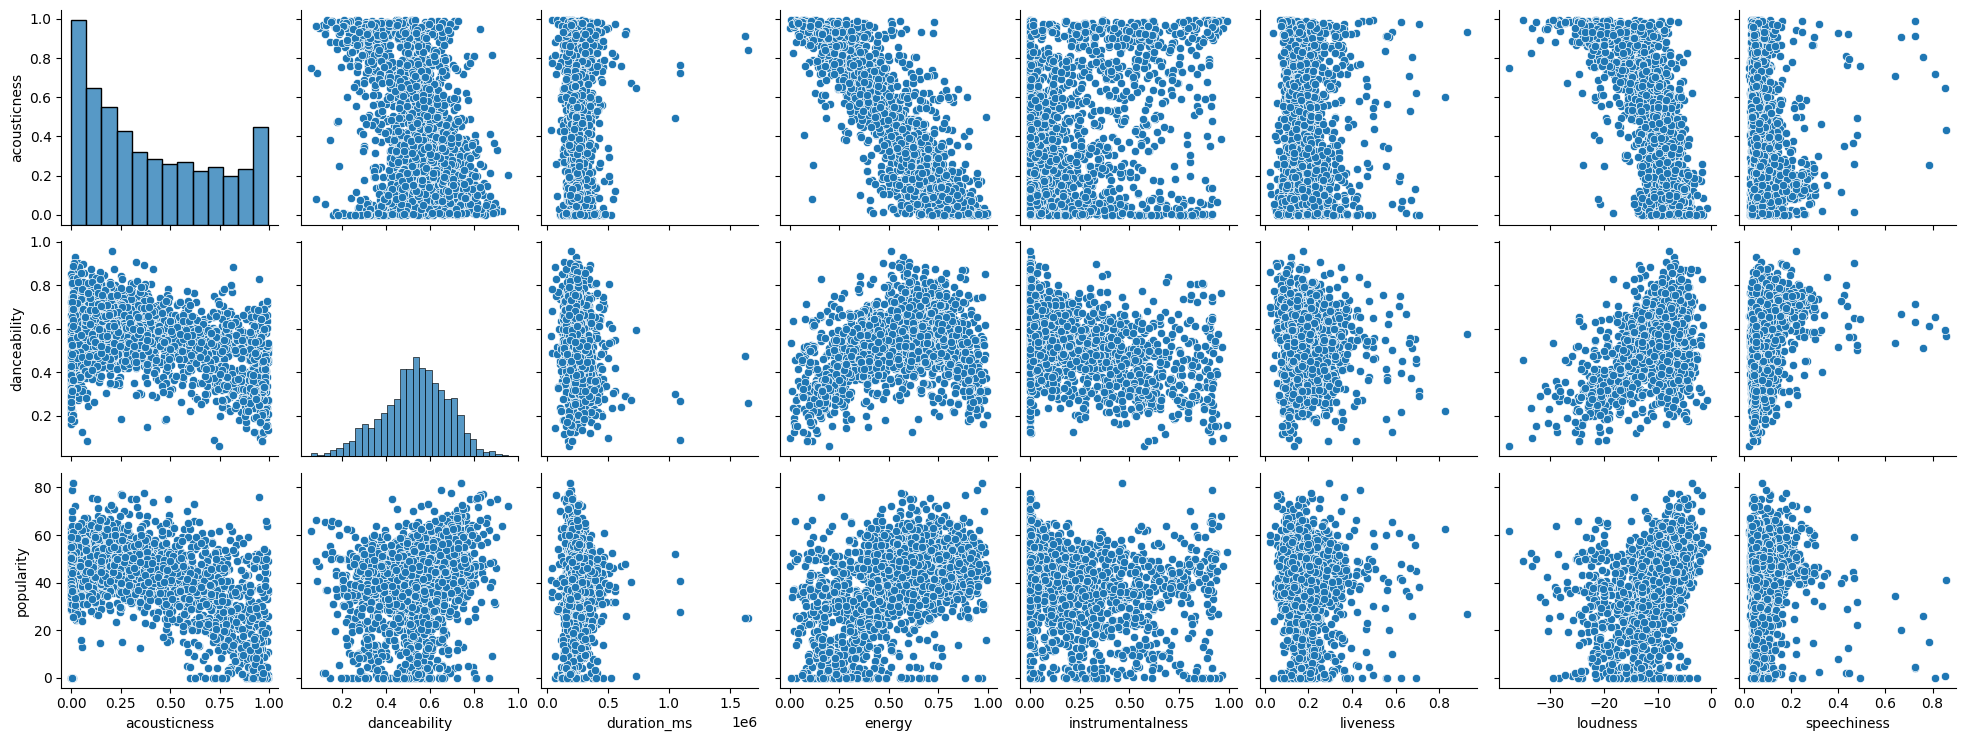

In [73]:
sns.pairplot(data,
    x_vars=["acousticness", "danceability", "duration_ms","energy","instrumentalness","liveness","loudness","speechiness"],
    y_vars=["acousticness", "danceability","popularity"],
)


Se llama a la función implementada para mostrar los datos cargados:

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea

La hipotesis para la regresión logistica se define como:

$$ h_\theta(x) = g(\theta^T x)$$

donde la función $g$ is la función sigmoidea. La función sigmoidea se define como:

$$g(z) = \frac{1}{1+e^{-z}}$$.

Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [74]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [75]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [76]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print(X)

[[1.00000000e+00 2.13200000e+03 4.20568435e-01 ... 2.91874985e-01
  4.73057973e+01 7.00000000e+00]
 [1.00000000e+00 2.41100000e+03 2.69332785e-01 ... 6.53945455e-01
  3.31022727e+01 7.00000000e+00]
 [1.00000000e+00 2.44400000e+03 4.48891067e-01 ... 3.34260000e-01
  4.79600000e+01 5.00000000e+00]
 ...
 [1.00000000e+00 1.13000000e+03 8.62063878e-01 ... 6.43081184e-01
  1.42938776e+00 7.00000000e+00]
 [1.00000000e+00 1.29400000e+03 6.56800564e-01 ... 4.98180952e-01
  3.82509158e+01 7.00000000e+00]
 [1.00000000e+00 8.60000000e+02 1.03194137e-01 ... 5.68016111e-01
  3.31283916e+01 9.00000000e+00]]


La funcion de costo en una regresión logistica es:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

y el gradiente del costo es un vector de la misma longitud como $\theta$ donde el elemento $j^{th}$ (para $j = 0, 1, \cdots , n$) se define como:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Si bien este gradiente parece idéntico al gradiente de regresión lineal, la fórmula es diferente porque la regresión lineal y logística tienen diferentes definiciones de $h_\theta(x)$.
<a id="costFunction"></a>

In [77]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [78]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [79]:
#Carga de dataset
data = pd.read_csv('datasets/test.csv')
print(data)

     genres  acousticness  danceability    duration_ms    energy  \
0      1475      0.839905      0.494950  189065.098348  0.309304   
1       124      0.000027      0.290000  348640.000000  0.717000   
2      1127      0.955500      0.596500  123213.500000  0.264000   
3      2564      0.366000      0.792000  256227.000000  0.492000   
4      1361      0.000788      0.266000  222060.000000  0.987500   
..      ...           ...           ...            ...       ...   
528     923      0.675011      0.498946  189968.133420  0.431449   
529     857      0.534867      0.767792  183242.786111  0.472503   
530    1321      0.979000      0.378000  258873.000000  0.369500   
531    2099      0.180943      0.493833  183311.033333  0.771933   
532     874      0.829000      0.629500  250146.500000  0.200500   

     instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0            0.391370  0.131855 -15.796986     0.056651  115.872008  0.508700   
1            0.816000

In [80]:
fila_deseada = 152

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[ 3.93000000e+02  4.79275600e-01  1.47083333e-01  6.69074333e+05
  5.58750000e-01  7.98500000e-01  1.20391667e-01 -1.09054167e+01
  5.90333333e-02  9.96151667e+01  5.79416667e-02  4.38333333e+01
  1.10000000e+01  1.00000000e+00]


In [81]:
#sacamos la media entre los datos de test y lo utilizamos como el valor esperado.
r = np.mean(data, 0)
print(r)

genres                1318.431520
acousticness             0.408812
danceability             0.544838
duration_ms         250184.248197
energy                   0.556943
instrumentalness         0.202093
liveness                 0.195997
loudness               -10.475097
speechiness              0.090283
tempo                  118.143857
valence                  0.509116
popularity              39.862329
key                      5.757974
mode                     0.842402
dtype: float64


theta calculado por el descenso por el gradiente: [ 4.17040520e-11  5.41974809e-08  2.07535519e-11  2.11297465e-11
  6.46214698e-06  2.19378109e-11  4.63702839e-12  9.15301356e-12
 -4.15030682e-10  3.54132770e-12  4.85142800e-09  2.36849452e-11
  1.28517020e-09  1.84667361e-10]
Una cancion con diferentes caracteristicas tiene el modo: (usando el descenso por el gradiente):0.8343532643628025


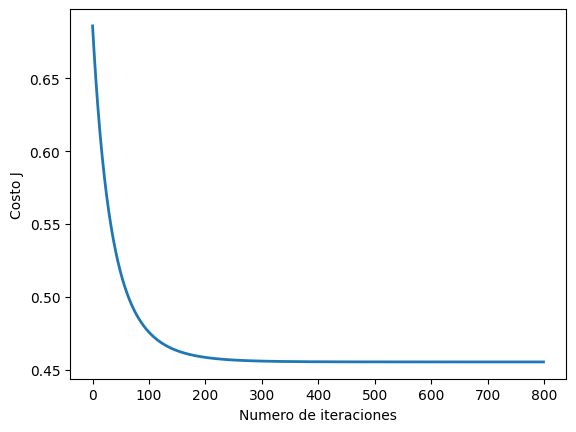

In [82]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.000000000001
num_iters = 800

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(14)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array =[1,1318.431520,  0.408812,0.544838,250184.248197,0.556943,0.202093,0.195997,-10.475097,0.090283,118.143857,0.509116,39.862329,5.757974]

modo = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Una cancion con diferentes caracteristicas tiene el modo: (usando el descenso por el gradiente):{modo}")

In [83]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [84]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)
cost, grad = costFunction(initial_theta, X, y)
print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.7\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-3.43266072e-01, -4.55317222e+02, -1.40092454e-01, -1.80817496e-01, -8.46303568e+04, -1.92042996e-01, -6.68410206e-02, -6.76148339e-02, 3.56921217e+00, -2.80606891e-02, -4.06766774e+01, -1.71377087e-01,-1.33710416e+01, -1.96386673e+00]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.7

[-3.43266072e-01 -4.55317222e+02 -1.40092454e-01 -1.80817496e-01
 -8.46303568e+04 -1.92042996e-01 -6.68410206e-02 -6.76148339e-02
  3.56921217e+00 -2.80606891e-02 -4.06766774e+01 -1.71377087e-01
 -1.33710416e+01 -1.96386673e+00]
Gradiente en theta inicial (zeros):
	[-0.3433, -455.3172, -0.1401, -0.1808, -84630.3568, -0.1920, -0.0668, -0.0676, 3.5692, -0.0281, -40.6767, -0.1714, -13.3710, -1.9639]
Gradiente esperado (aproximado):
	[-3.43266072e-01, -4.55317222e+02, -1.40092454e-01, -1.80817496e-01, -8.46303568e+04, -1.92042996e-01, -6.68410206e-02, -6.76148339e-02, 3.56921217e+00, -2.80606891e-02, -4.06766774e+01, -1.71377087e-01,-1.33710416e+01, -1.96386673e+00]



In [85]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([1,1318.431520,  0.408812,0.544838,250184.248197,0.556943,0.202093,0.195997,-10.475097,0.090283,118.143857,0.509116,39.862329,5.757974])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)
print('Costo en theta prueba: {:.0f}'.format(cost))
print('Costo esperado (aproximado): \n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[ 1.00000000e+00  1.31843152e+03  4.08812000e-01  5.44838000e-01  2.50184248e+05  5.56943000e-01  2.02093000e-01  1.95997000e-01 -1.04750970e+01  9.02830000e-02  1.18143857e+02  5.09116000e-01  3.98623290e+01  5.75797400e+00]')

[ 1.00000000e+00  1.31843152e+03  4.08812000e-01  5.44838000e-01
  2.50184248e+05  5.56943000e-01  2.02093000e-01  1.95997000e-01
 -1.04750970e+01  9.02830000e-02  1.18143857e+02  5.09116000e-01
  3.98623290e+01  5.75797400e+00]
Costo en theta prueba: nan
Costo esperado (aproximado): 

Gradiente en theta prueba:
	[0.157, 212.067, 0.058, 0.086, 39961.204, 0.091, 0.033, 0.029, -1.607, 0.013, 18.836, 0.077, 6.721, 1.014]
Gradiente esperado (aproximado):
	[ 1.00000000e+00  1.31843152e+03  4.08812000e-01  5.44838000e-01  2.50184248e+05  5.56943000e-01  2.02093000e-01  1.95997000e-01 -1.04750970e+01  9.02830000e-02  1.18143857e+02  5.09116000e-01  3.98623290e+01  5.75797400e+00]


C:\Users\micky\AppData\Local\Temp\ipykernel_13600\1056559099.py:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`

En el codigo anterior se encontró los parámetros óptimos de un modelo de regresión lineal al implementar el descenso de gradiente. Se implemento una función de costo y se calculó su gradiente, utilizando el algoritmo del descenso por el gradiente.

En lugar de realizar los pasos del descenso por el gradiente, se utilizará el [módulo `scipy.optimize`] (https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy es una biblioteca de computación numérica para `python`. Proporciona un módulo de optimización para la búsqueda y minimización de raíces. A partir de `scipy 1.0`, la función` scipy.optimize.minimize` es el método a utilizar para problemas de optimización (tanto restringidos como no restringidos).

For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:

Para la regresión logística, se desea optimizar la función de costo $J(\theta)$ con los parámetros $\theta$.
Concretamente, se va a utilizar `optimize.minimize` para encontrar los mejores parámetros $\theta$ para la función de costo de regresión logística, dado un dataset fijo (de valores X e y). Se pasara a `optimize.minimize` las siguientes entradas:

- `costFunction`: Una función de costo que, cuando se le da el dataset de entrenamiento y un $\theta$ particular, calcula el costo de regresión logística y el gradiente con respecto a $\theta$ para el dataset(X, y). Es importante tener en cuenta que solo se pasa el nombre de la función sin el paréntesis. Esto indica que solo proporcionamos una referencia a esta función y no evaluamos el resultado de esta función.
- `initial_theta`: Los valores iniciales de los parametros que se tratan de optimizar.
- `(X, y)`: Estos son argumentos adicionales a la funcion de costo.
- `jac`: Indicación si la función de costo devuelve el jacobiano (gradiente) junto con el valor de costo. (True)
- `method`: Método / algoritmo de optimización a utilizar
- `options`: Opciones adicionales que pueden ser específicas del método de optimización específico. Solo se indica al algoritmo el número máximo de iteraciones antes de que termine.

Si se ha completado la `costFunction` correctamente,`optimize.minimize` convergerá en los parámetros de optimización correctos y devolverá los valores finales del costo y $\theta$ en un objeto de clase.

Al usar `optimize.minimize`, no se tuvo que escribir ningún bucle ni establecer una tasa de aprendizaje como se hizo para el descenso de gradientes. Todo esto se hace mediante `optimize.minimize`: solo se necesita proporcionar una función que calcule el costo y el gradiente.

A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [86]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.5\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[3.398, -0.000, 0.177, -1.248, -0.000, -0.105, -0.501, 1.325, 0.019, -0.221, -0.004, 0.691, -0.010, -0.058]')

Costo con un valor de theta encontrado por optimize.minimize: 0.426
Costo esperado (aproximado): 0.5

theta:
	[3.398, -0.000, 0.177, -1.248, -0.000, -0.105, -0.501, 1.325, 0.019, -0.221, -0.004, 0.691, -0.010, -0.058]
Theta esperado (aproximado):
	[3.398, -0.000, 0.177, -1.248, -0.000, -0.105, -0.501, 1.325, 0.019, -0.221, -0.004, 0.691, -0.010, -0.058]


C:\Users\micky\AppData\Local\Temp\ipykernel_13600\291767123.py:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


In [87]:
# verificar si ingresa o no a la universidad
X_array = [1,1318.431520,  0.408812,0.544838,250184.248197,0.556943,0.202093,0.195997,-10.475097,0.090283,118.143857,0.509116,39.862329,5.757974]
theta_om = [3.398, -0.000, 0.177, -1.248, -0.000, -0.105, -0.501, 1.325, 0.019, -0.221, -0.004, 0.691, -0.010, -0.058]
modo = sigmoid(np.dot(X_array, theta_om))   # Se debe cambiar esto

print(f"Una cancion con diferentes caracteristicas tiene el modo: (usando el descenso por el gradiente):{modo}")

Una cancion con diferentes caracteristicas tiene el modo: (usando el descenso por el gradiente):0.860329439771449


Una vez que se completa `optimize.minimize`, se usa el valor final de $\theta$ para visualizar el límite de decisión en los datos de entrenamiento.

Para hacerlo, se implementa la función `plotDecisionBoundary` para trazar el límite de decisión sobre los datos de entrenamiento.

In [88]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


In [89]:
# Graficar limites
#plotDecisionBoundary(plotData, theta, X, y)

<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [90]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [91]:
#  Predice la probabilidad el modo de una cancion con diferentes caracteristicas:
prob = sigmoid(np.dot([1,1318.431520,  0.408812,0.544838,250184.248197,0.556943,0.202093,0.195997,-10.475097,0.090283,118.143857,0.509116,39.862329,5.757974], theta))
print('Para una cancion con diferentes caracteristicas, se predice una probabilidad de modo de: {:.3f}%'.format(prob))
print('Valor esperado: 0.85 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Para una cancion con diferentes caracteristicas, se predice una probabilidad de modo de: 0.850%
Valor esperado: 0.85 +/- 0.002

Precisión de entrenamiento: 84.33 %
Precisión esperada (aproximadamente): 89.00 %
